In [87]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
matplotlib.rc('font', size=18)

from unc.utils import load_info
from definitions import ROOT_DIR

In [28]:
obs_path = Path(ROOT_DIR, 'results', 'lobster_diff_obs.npy')
all_obs = load_info(obs_path)

In [69]:
gt_predictions = all_obs['2e'][:, :, [4, 7]]
trace_predictions = all_obs['2o'][:, :, [3, 6]]
gvf_predictions = all_obs['2g'][:, :, -2:]

pf_r1_predictions = np.sum(all_obs['2pb'][:, :, [1, 5, 9]], axis=-1)
pf_r2_predictions = np.sum(all_obs['2pb'][:, :, [3, 7, 11]], axis=-1)

pf_predictions = np.stack([pf_r1_predictions, pf_r2_predictions], axis=-1)

all_other_predictions = [('trace', trace_predictions), ('gvf', gvf_predictions), ('pf', pf_predictions)]

In [74]:
all_corr = {}
reward_idx = 1

for algo, other_predictions in all_other_predictions:
    all_corr[algo] = []
    for b in range(gt_predictions.shape[0]):
        corr = np.corrcoef(other_predictions[b, :, reward_idx], gt_predictions[b, :, reward_idx])[0, 1]
        all_corr[algo].append(corr)

all_avg_corr = {}
for k, corr in all_corr.items():
    all_avg_corr[k] = np.average(corr)

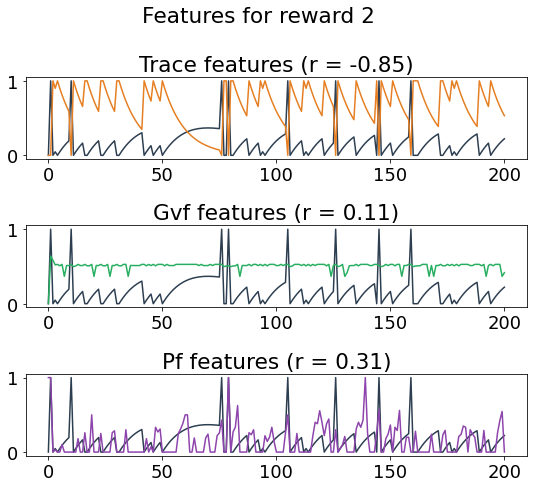

In [97]:
# plotting raw predictions
gt_color = "#2c3e50"
other_colors = ["#e67e22", "#27ae60", "#8e44ad"]
batch_idx = 0


fig, axes = plt.subplots(3)
fig.set_size_inches(8, 7)

for i, (algo, other_predictions) in enumerate(all_other_predictions):
    gt_to_plot = gt_predictions[batch_idx, :, reward_idx]
    other_to_plot = other_predictions[batch_idx, :, reward_idx]
    x = np.arange(gt_to_plot.shape[0])
    
    axes[i].plot(x, gt_to_plot, color=gt_color)
    axes[i].plot(x, other_to_plot, color=other_colors[i])
    axes[i].set_title(f"{algo.capitalize()} features (r = {all_avg_corr[algo]:.2f})")
    
    axes[i].set_xticks([0, 50, 100, 150, 200])

fig.suptitle(f"Features for reward {reward_idx + 1}")
fig.tight_layout()

In [112]:
# For OTHER behavior
other_obs_path = Path(ROOT_DIR, 'results', 'lobster_diff_obs_other_behavior.npy')
all_other_obs = load_info(other_obs_path)
all_other_obs['2pb'].shape

(30, 200, 12)

In [113]:
gt_trace_other_predictions = all_other_obs['2e_2o'][:, :, [4, 7]]
gt_pf_other_predictions = all_other_obs['2e_2pb'][:, :, [4, 7]]
gt_gvf_other_predictions = all_other_obs['2e_2g'][:, :, [4, 7]]


trace_other_predictions = all_other_obs['2o'][:, :, [3, 6]]
gvf_other_predictions = all_other_obs['2g'][:, :, -2:]

pf_other_r1_predictions = np.sum(all_other_obs['2pb'][:, :, [1, 5, 9]], axis=-1)
pf_other_r2_predictions = np.sum(all_other_obs['2pb'][:, :, [3, 7, 11]], axis=-1)

pf_other_predictions = np.stack([pf_other_r1_predictions, pf_other_r2_predictions], axis=-1)

all_predictions = [
    ('trace', trace_other_predictions, gt_trace_other_predictions), 
    ('pf', pf_other_predictions, gt_pf_other_predictions),
    ('gvf', gvf_other_predictions, gt_gvf_other_predictions), 
]


In [115]:
all_other_corr = {}
reward_idx = 1

for algo, other_predictions, gt_predictions in all_predictions:
    all_other_corr[algo] = []
    for b in range(gt_predictions.shape[0]):
        corr = np.corrcoef(other_predictions[b, :, reward_idx], gt_predictions[b, :, reward_idx])[0, 1]
        all_other_corr[algo].append(corr)

all_other_avg_corr = {}
for k, corr in all_other_corr.items():
    all_other_avg_corr[k] = np.average(corr)

trace (200,) (200,)
pf (200,) (200,)
gvf (200,) (200,)


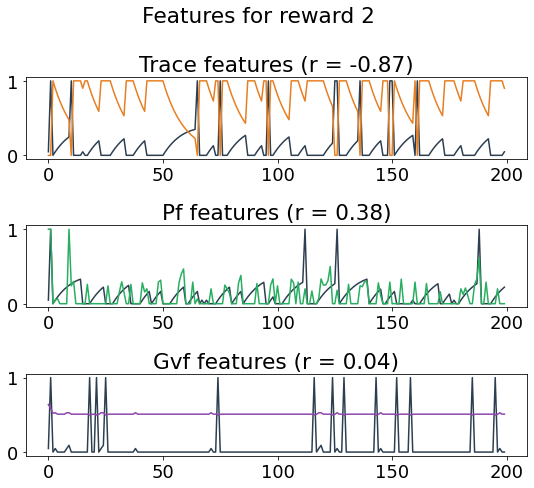

In [116]:
fig, axes = plt.subplots(3)
fig.set_size_inches(8, 7)

for i, (algo, predictions, gt_other_predictions) in enumerate(all_predictions):
    gt_to_plot = gt_other_predictions[batch_idx, :, reward_idx]
    pred_to_plot = predictions[batch_idx, :, reward_idx]
    print(algo, gt_to_plot.shape, pred_to_plot.shape)
    x = np.arange(gt_to_plot.shape[0])
    
    axes[i].plot(x, gt_to_plot, color=gt_color)
    axes[i].plot(x, pred_to_plot, color=other_colors[i])
    axes[i].set_title(f"{algo.capitalize()} features (r = {all_other_avg_corr[algo]:.2f})")
    
    axes[i].set_xticks([0, 50, 100, 150, 200])

fig.suptitle(f"Features for reward {reward_idx + 1}")
fig.tight_layout()